# 协作通信与中继技术在NOMA系统中的应用

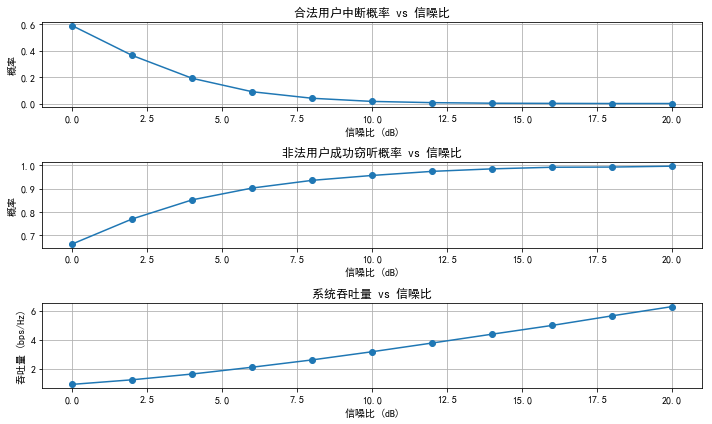

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']

plt.rcParams['axes.unicode_minus']=False
# 仿真参数
num_simulations = 10000  # 仿真次数
snr_dbs = np.arange(0, 21, 2)  # SNR范围（单位：dB）
threshold_legal = 1  # 合法用户容量阈值
threshold_eavesdropper = 0.5  # 非法用户容量阈值
power_allocation_source = 0.5  # 源节点功率分配系数
power_allocation_relay = 1 - power_allocation_source  # 中继节点功率分配系数

legal_interrupt_probs = []  # 合法用户中断概率
eavesdropper_success_probs = []  # 非法用户成功窃听概率
system_throughputs = []  # 系统吞吐量

for snr_db in snr_dbs:
    snr = 10**(snr_db / 10)
    legal_interrupt_count = 0
    eavesdropper_success_count = 0
    total_throughput = 0
    
    for _ in range(num_simulations):
        # 生成信道增益（瑞利衰落）
        h_source_to_relay = np.abs(np.random.normal(0, 1) + 1j * np.random.normal(0, 1)) / np.sqrt(2)
        h_relay_to_destination = np.abs(np.random.normal(0, 1) + 1j * np.random.normal(0, 1)) / np.sqrt(2)
        h_eavesdropper = np.abs(np.random.normal(0, 1) + 1j * np.random.normal(0, 1)) / np.sqrt(2)
        
        # 计算信道容量
        capacity_legal = np.log2(1 + (power_allocation_source * snr * h_source_to_relay**2) + (power_allocation_relay * snr * h_relay_to_destination**2))
        capacity_eavesdropper = np.log2(1 + (snr * h_eavesdropper**2))
        
        # 判断中断事件
        if capacity_legal < threshold_legal:
            legal_interrupt_count += 1
        if capacity_eavesdropper > threshold_eavesdropper:
            eavesdropper_success_count += 1
        
        total_throughput += capacity_legal
    
    # 统计中断概率和系统吞吐量
    legal_interrupt_probs.append(legal_interrupt_count / num_simulations)
    eavesdropper_success_probs.append(eavesdropper_success_count / num_simulations)
    system_throughputs.append(total_throughput / num_simulations)

# 可视化结果
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(snr_dbs, legal_interrupt_probs, marker='o', label='合法用户中断概率')
plt.xlabel('信噪比 (dB)')
plt.ylabel('概率')
plt.title('合法用户中断概率 vs 信噪比')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(snr_dbs, eavesdropper_success_probs, marker='o', label='非法用户成功窃听概率')
plt.xlabel('信噪比 (dB)')
plt.ylabel('概率')
plt.title('非法用户成功窃听概率 vs 信噪比')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(snr_dbs, system_throughputs, marker='o', label='系统吞吐量')
plt.xlabel('信噪比 (dB)')
plt.ylabel('吞吐量 (bps/Hz)')
plt.title('系统吞吐量 vs 信噪比')
plt.grid(True)

plt.tight_layout()
plt.show()

